In [2]:
import pandas as pd
import plotly.express as px

In [38]:
df = pd.read_feather('../../data/Doc_Con_Pre_sociodemo.feather')
df.head()

,ID,Clases,Grados,Nivel,Fecha,Política de datos,Código IE,Tipo ID,Edad,Sexo,Cabeza de hogar,Estado civil,Líder comunitario,Formado CFK,Implementa fichas,Enseña STEM,Formado STEM,Formado tecnología e informática
0,57440504,Ciencias naturales y educación ambiental.,10°,Secundaria,19/04,Sí,129,Cédula de ciudadanía,48,Femenino,Sí,Separado/a o Divorciado/a,No,No,No,STEM,STEM,No
1,57440504,Ciencias naturales y educación ambiental.,11°,Secundaria,19/04,Sí,129,Cédula de ciudadanía,48,Femenino,Sí,Separado/a o Divorciado/a,No,No,No,STEM,STEM,No
2,57440504,Ciencias naturales y educación ambiental.,9°,Secundaria,19/04,Sí,129,Cédula de ciudadanía,48,Femenino,Sí,Separado/a o Divorciado/a,No,No,No,STEM,STEM,No
3,35895805,Ciencias naturales y educación ambiental.,10°,Secundaria,19/04,Sí,7,Cédula de ciudadanía,37,Femenino,Sí,Casado/a o En unión libre,No,No,No,STEM,STEM,No
4,35895805,Ciencias naturales y educación ambiental.,11°,Secundaria,19/04,Sí,7,Cédula de ciudadanía,37,Femenino,Sí,Casado/a o En unión libre,No,No,No,STEM,STEM,No


In [39]:
pivot_1 = pd.pivot_table(df, index=['Nivel','Sexo'], values='ID', aggfunc='nunique').reset_index() #aggfunc en función de values
pivot_1

,Nivel,Sexo,ID
0,Ambos,Femenino,43
1,Ambos,Masculino,31
2,Ambos,Prefiero no responder,0
3,Primaria,Femenino,482
4,Primaria,Masculino,127
5,Primaria,Prefiero no responder,3
6,Secundaria,Femenino,489
7,Secundaria,Masculino,446
8,Secundaria,Prefiero no responder,1


In [40]:
total='Nivel'
totaldf= pd.pivot_table(df, index=total, values='ID', aggfunc='nunique').reset_index()
totaldf.head()

,Nivel,ID
0,Ambos,74
1,Primaria,612
2,Secundaria,936


In [41]:
totaldf=totaldf.rename(columns={'ID':'total'})

In [45]:
piv=pd.merge(pivot_1,totaldf,on=total)
piv["relative"]=round(piv["ID"]/piv["total"]*100,2)
piv

,Nivel,Sexo,ID,total,relative
0,Ambos,Femenino,43,74,58.11
1,Ambos,Masculino,31,74,41.89
2,Ambos,Prefiero no responder,0,74,0.00
3,Primaria,Femenino,482,612,78.76
4,Primaria,Masculino,127,612,20.75
5,Primaria,Prefiero no responder,3,612,0.49
6,Secundaria,Femenino,489,936,52.24
7,Secundaria,Masculino,446,936,47.65
8,Secundaria,Prefiero no responder,1,936,0.11


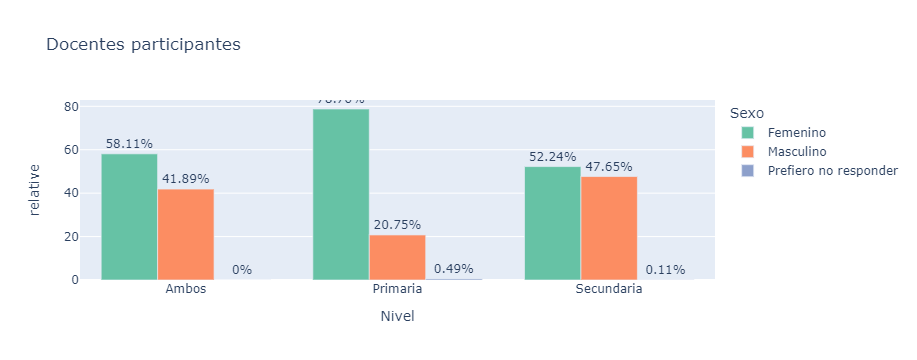

In [51]:
fig_1 = px.bar(piv, x='Nivel', y ='relative',  color='Sexo', text='relative', barmode='group',
               color_discrete_sequence= px.colors.qualitative.Set2,
               title='Docentes participantes')
fig_1.update_traces(textposition='outside',
                    texttemplate='%{text}%')
fig_1.show()

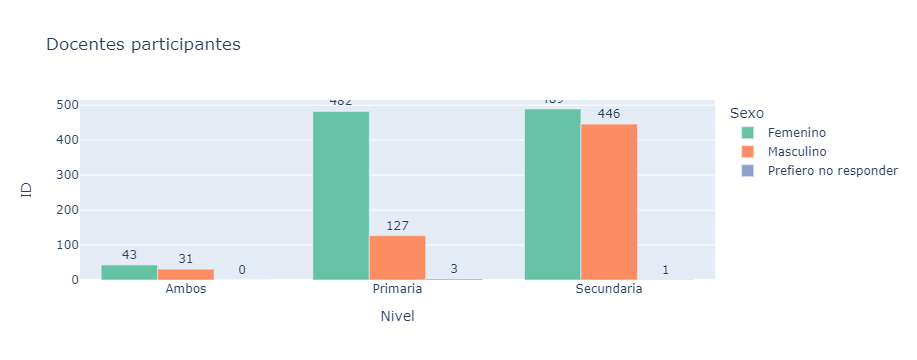

In [18]:
#aggfunc=nunique,mean
fig_1 = px.bar(pivot_1, x='Nivel', y ='ID',  color='Sexo', text='ID', barmode='group',
               color_discrete_sequence= px.colors.qualitative.Set2,
               title='Docentes participantes')
fig_1.update_traces(textposition='outside',
                    texttemplate='%{text}')
fig_1.show()

In [45]:
df[df.ID == 66]

,ID,Clases,Grados,Nivel_x,Nivel_y,Fecha,Política de datos,Código IE,Tipo ID,Edad,Sexo,Cabeza de hogar,Estado civil,Líder comunitario,Formado CFK,Implementa fichas,Enseña STEM,Formado STEM,Formado tecnología e informática
1046,66.0,Ciencias naturales y educación ambiental.,2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1047,66.0,"Ciencias sociales, historia, geografía, consti...",2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1048,66.0,Educación artística.,2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1049,66.0,Educación ética y en valores humanos.,2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1050,66.0,"Educación física, recreación y deportes.",2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1051,66.0,Educación religiosa.,2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1052,66.0,Educación religiosa.,2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1053,66.0,"Humanidades, lengua castellana e idiomas extra...",2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No
1054,66.0,Matemáticas.,2°,Primaria,Primaria,22/04,Sí,67,Cédula de ciudadanía,51.0,Femenino,Sí,Casado/a o En unión libre,No,No,No,No STEM,No STEM,No


In [46]:
df[df.Clases == 'Tecnología e informática.']

,ID,Clases,Grados,Nivel_x,Nivel_y,Fecha,Política de datos,Código IE,Tipo ID,Edad,Sexo,Cabeza de hogar,Estado civil,Líder comunitario,Formado CFK,Implementa fichas,Enseña STEM,Formado STEM,Formado tecnología e informática
17,1.741525e+07,Tecnología e informática.,10°,Secundaria,Secundaria,19/04,Sí,107,Cédula de ciudadanía,51.0,Masculino,Sí,Casado/a o En unión libre,No,Sí,No,STEM,STEM,No
20,1.741525e+07,Tecnología e informática.,11°,Secundaria,Secundaria,19/04,Sí,107,Cédula de ciudadanía,51.0,Masculino,Sí,Casado/a o En unión libre,No,Sí,No,STEM,STEM,No
140,9.855474e+07,Tecnología e informática.,10°,Secundaria,Ambos,22/04,Sí,235,Cédula de ciudadanía,51.0,Masculino,Sí,Separado/a o Divorciado/a,No,No,No,No STEM,No STEM,No
141,9.855474e+07,Tecnología e informática.,11°,Secundaria,Ambos,22/04,Sí,235,Cédula de ciudadanía,51.0,Masculino,Sí,Separado/a o Divorciado/a,No,No,No,No STEM,No STEM,No
142,9.855474e+07,Tecnología e informática.,3°,Secundaria,Ambos,22/04,Sí,235,Cédula de ciudadanía,51.0,Masculino,Sí,Separado/a o Divorciado/a,No,No,No,No STEM,No STEM,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,1.033782e+09,Tecnología e informática.,Prescolar,Primaria,Primaria,21/04,Sí,107,Cédula de ciudadanía,26.0,Femenino,No,Soltero/a,No,No,No,No STEM,No STEM,"Sí, otro"
4707,4.288423e+07,Tecnología e informática.,Prescolar,Primaria,Primaria,22/04,Sí,235,Cédula de ciudadanía,57.0,Femenino,Sí,Soltero/a,No,No,No,STEM,STEM,"Sí, otro"
4708,4.076487e+07,Tecnología e informática.,Prescolar,Primaria,Primaria,22/04,Sí,47,Cédula de ciudadanía,56.0,Femenino,No,Casado/a o En unión libre,No,Sí,No,Enseña ambos,No STEM,"Sí, otro"
4709,5.157516e+07,Tecnología e informática.,Prescolar,Primaria,Primaria,22/04,Sí,10,Cédula de ciudadanía,64.0,Femenino,No,Casado/a o En unión libre,Sí,Sí,No,Enseña ambos,No STEM,"Sí, otro"
